# Clustering Yelp Restaurants

**To be completed INDIVIDUALLY and due on Febrary 17 at 7pm.**

In this assignment, we will be working with the [Yelp dataset](https://www.yelp.com/dataset/challenge). Download the data from Round 11. You can find the format of the dataset [here](https://www.yelp.com/dataset/documentation/json).

a) From the Business Objects, let's try to find culinary districts in **Las Vegas**. These are characterized by closeness and similarity of restaurants. Use the "longitude" and "latitude" to cluster closeness. Use "categories" to cluster for similarity. You are going to use the following popular categories: 'Mexican', 'Fast Food', 'Pizza', 'American (Traditional)', 'Sandwitches', 'Breakfast & Brunch', 'Chinese', 'Italian'.

Note that the spatial coordinates and restaurant categories have different units of scale. Your results could be arbitrarily skewed if you don't incorporate some scaling. For this purpose, you need to scale the latitude and longitude at a range from [1,5].

Find clusters using the 3 different techniques we discussed in class: k-means++, hierarchical, and GMM. **(3 pts)**

In [4]:
import numpy as np
import scipy as sp
import json
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

df = pd.read_json("C:\\software\\cs 506\\cs506-spring2018-hw2-1-jweixuan\\business.json",lines=True)


3477
3477


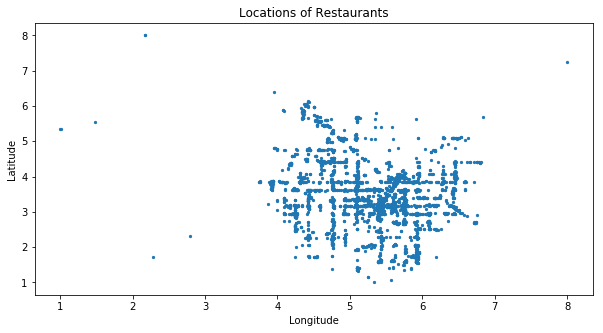

In [47]:
from sklearn.preprocessing import MinMaxScaler
categories = ['Mexican', 'Fast Food', 'Pizza', 'American (Traditional)', 'Sandwitches', 'Breakfast & Brunch', 'Chinese', 'Italian']

select = []
ctg = []
for line in df.itertuples():
    if line.city == "Las Vegas":
        tmp = []
        flag = 0
        
        for cat in categories:
            if cat in line.categories:
                flag = 1
                tmp.append(1)
            else:
                tmp.append(0)
                
        if flag == 1:
            select.append([line.longitude,line.latitude])
            ctg.append(tmp)
            
sel = np.asarray(select)
scaler = MinMaxScaler(copy=True, feature_range=(1, 8))
scaler.fit(sel)
s = scaler.transform(sel)
k = s.tolist()

print(len(k))
print(len(ctg))
for i in range(len(k)):
    k[i] += ctg[i]

#print(k)
k = np.asarray(k)
plt.figure(figsize=(10,5))
_ = plt.scatter(k[:, 0], k[:, 1], s = 5)   #k[:,0]  every element[0] = longitude,etc
plt.title('Locations of Restaurants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

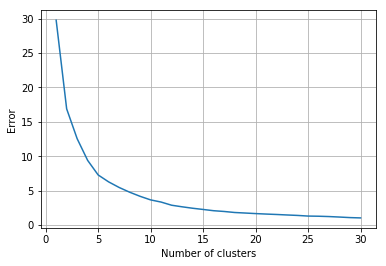

In [48]:
# determine the number of clusters using K-means error

def evaluate_clusters(X,max_clusters):
    error = np.zeros(max_clusters+1)
    error[0] = 0;
    for k in range(1,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit_predict(X)
        error[k] = kmeans.inertia_

    plt.plot(range(1,len(error)),error[1:])
    plt.xlabel('Number of clusters')
    plt.ylabel('Error')
    plt.grid("True")
    plt.show()

evaluate_clusters(select,30) # cant use array, only can use list

print("According to the figure, n = 8 is a point that makes a sharp change")

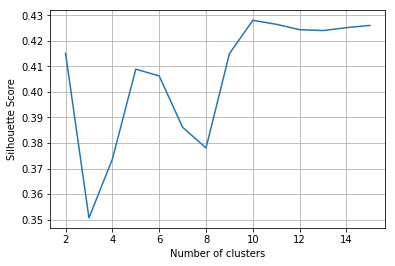

In [58]:
# determine the number of clusters using silhouette_score

def sc_evaluate_clusters(X,max_clusters):
    s = np.zeros(max_clusters+1)
    s[0] = 0;
    s[1] = 0;
    for k in range(2,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit_predict(X)
        s[k] = metrics.silhouette_score(X,kmeans.labels_,metric='euclidean')
    plt.plot(range(2,len(s)),s[2:])
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.grid("True")
    plt.show()
    
sc_evaluate_clusters(select,15)

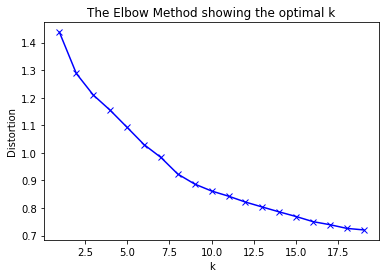

In [50]:
# determine the number of clusters using elbow method
 
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']
 
# k means determine k
distortions = []
K = range(1,20)
for i in K:
    kmeanModel = KMeans(n_clusters=i).fit(k)
    kmeanModel.fit(k)
    distortions.append(sum(np.min(cdist(k, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / k.shape[0])
 
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

print("According to the figure, n = 8 is a point that makes a sharp change")

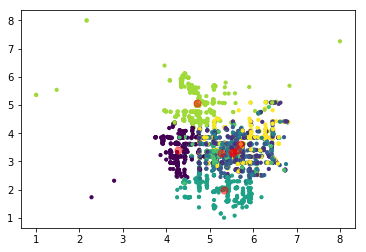

In [52]:
import seaborn as sns
kmeans = KMeans(init='k-means++', n_clusters=8, n_init=100)
y_kmeans = kmeans.fit_predict(k)
centers = kmeans.cluster_centers_
#print(centers)
labels = kmeans.labels_
error = kmeans.inertia_
#print(type(k[:,0]))
plt.scatter(k[:, 0], k[:, 1], c=y_kmeans, s=10, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50, alpha=0.5);
plt.show()


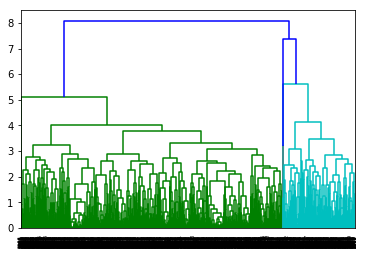

In [53]:
%matplotlib inline
import scipy.cluster
import scipy.cluster.hierarchy as hierarchy
import scipy.spatial.distance
# linkages = ['single','complete','average','weighted']
Z = hierarchy.linkage(k,method='complete')
R = hierarchy.dendrogram(Z)
#print(R)

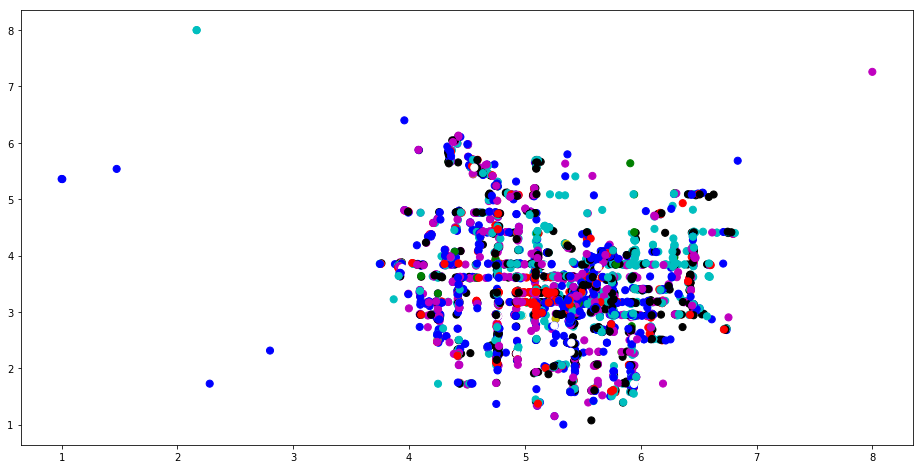

In [56]:
from sklearn import mixture


gmm = mixture.GaussianMixture(n_components=8, covariance_type='full')
gmm.fit(k)
y_pred = gmm.predict(k)
colors = ['bgrcmykw'[p] for p in y_pred]
plt.figure(figsize=(16,8))
_ = plt.scatter(k[:, 0], k[:, 1], color=colors, s=50)

b) Explain your data representation and how you determined certain parameters (for example, the number of clusters for each method). **(1 pt)**

In my data, each object is represented by a 10 parameters vector. First two of a vector is longitude and latitude. And the next 8 parameters are 0 or 1. 1 represent this object has this catagory in 'Mexican', 'Fast Food', 'Pizza', 'American (Traditional)', 'Sandwitches', 'Breakfast & Brunch', 'Chinese', 'Italian', vice versa. 10000000 means this object has Mexican catagory.   
I use three function to determine the number of clusters for each method. According to the three figure from these three methods, n = 8 is the idea number of clusters.

c) Visualize the clusters by plotting the longitude/latitude of the restaurants in a scatter plot. Label each cluster with a category. In a markdown, explain how labels are assigned. **(2 pts)**

Note that some categories are inherently more common (e.g. "pizza"). When labeling your clusters, you want to avoid the scenario where all clusters are labeled as "pizza" simply because of the uniformly large number of these restaurants across all clusters. In other words, we don’t want to point out that pizza restaurants are pretty much evenly distributed in high quantities everywhere, but rather discover when they, or another type of restaurant, appear in notably high quantities.

In [70]:
from operator import add
cluster0 = []
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
cluster5 = []
cluster6 = []
cluster7 = []


"""       label is came from k-means                """

for i in range(len(k)):
    if labels[i] == 0:
        cluster0.append(list(k[i]))
    elif labels[i] == 1:
        cluster1.append(list(k[i]))
    elif labels[i] == 2:
        cluster2.append(list(k[i]))
    elif labels[i] == 3:
        cluster3.append(list(k[i]))
    elif labels[i] == 4:
        cluster4.append(list(k[i]))
    elif labels[i] == 5:
        cluster5.append(list(k[i]))
    elif labels[i] == 6:
        cluster6.append(list(k[i]))
    else:
        cluster7.append(list(k[i]))
#print(cluster0[0])
a0 = cluster0[0]
for i in range(1,len(cluster0)):
    a0 = (list(map(add, a0, cluster0[i])))
print(a0)

a1 = cluster1[0]
for i in range(1,len(cluster1)):
    a1 = (list(map(add, a1, cluster1[i])))
print(a1)

a2 = cluster2[0]
for i in range(1,len(cluster2)):
    a2 = (list(map(add, a2, cluster2[i])))
print(a2)

a3 = cluster3[0]
for i in range(1,len(cluster3)):
    a3 = (list(map(add, a3, cluster3[i])))
print(a3)

a4 = cluster4[0]
for i in range(1,len(cluster4)):
    a4 = (list(map(add, a4, cluster4[i])))
print(a4)

a5 = cluster5[0]
for i in range(1,len(cluster5)):
    a5 = (list(map(add, a5, cluster5[i])))
print(a5)

a6 = cluster6[0]
for i in range(1,len(cluster6)):
    a6 = (list(map(add, a6, cluster6[i])))
print(a6)

a7 = cluster7[0]
for i in range(1,len(cluster7)):
    a7 = (list(map(add, a7, cluster7[i])))
print(a7)

print(type(a5.index(max(a5[2:]))))

[1787.4792553738982, 1428.0458123732747, 80.0, 98.0, 83.0, 94.0, 0.0, 89.0, 13.0, 63.0]
[2604.7848706414457, 1577.0425590244431, 65.0, 462.0, 5.0, 34.0, 0.0, 3.0, 15.0, 0.0]
[2950.9275491191402, 1755.4493062791503, 7.0, 1.0, 16.0, 428.0, 0.0, 200.0, 1.0, 6.0]
[2383.0762627681042, 1444.6130462126353, 1.0, 1.0, 320.0, 5.0, 0.0, 5.0, 0.0, 226.0]
[2293.8928233514057, 848.58464367961108, 93.0, 140.0, 91.0, 101.0, 0.0, 50.0, 31.0, 43.0]
[1727.1580074957021, 1085.6621117273639, 1.0, 19.0, 0.0, 4.0, 0.0, 1.0, 328.0, 2.0]
[2122.3396219214624, 2283.4677978513646, 92.0, 144.0, 97.0, 101.0, 0.0, 57.0, 40.0, 42.0]
[2392.252204019318, 1514.7325053623986, 419.0, 19.0, 1.0, 7.0, 0.0, 19.0, 1.0, 6.0]
<class 'int'>


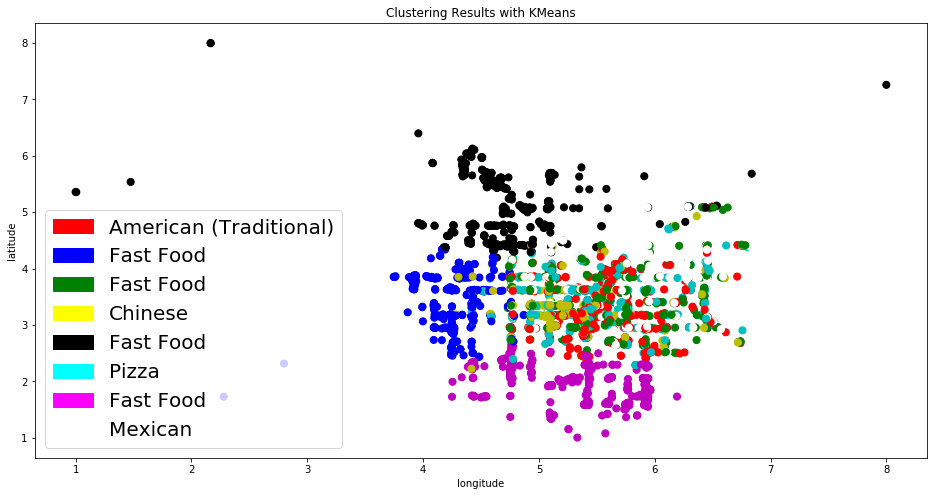

In [71]:
import matplotlib.patches as mpatches
colors = ['bgrcmykw'[p] for p in labels]
plt.figure(figsize=(16,8))
blue_patch = mpatches.Patch(color='blue', label=categories[a0.index(max(a0[2:])) - 2])
green_patch = mpatches.Patch(color='green', label=categories[a1.index(max(a1[2:])) - 2])
red_patch = mpatches.Patch(color='red', label=categories[a2.index(max(a2[2:])) - 2])
cyan_patch = mpatches.Patch(color='cyan', label=categories[a3.index(max(a3[2:]))-2])
magenta_patch = mpatches.Patch(color='magenta', label=categories[a4.index(max(a4[2:]))-2])
yellow_patch = mpatches.Patch(color='yellow', label=categories[a5.index(max(a5[2:]))-2])
black_patch = mpatches.Patch(color='black', label=categories[a6.index(max(a6[2:]))-2])
white_patch = mpatches.Patch(color='white', label=categories[a7.index(max(a7[2:]))-2])
plt.legend(handles=[red_patch, blue_patch, green_patch, yellow_patch, black_patch,cyan_patch,magenta_patch,white_patch], loc = 'lower left', prop={'size': 20})
plt.title('Clustering Results with KMeans')
plt.xlabel('longitude')
plt.ylabel('latitude')
_ = plt.scatter(k[:, 0], k[:, 1], color=colors, s=50)

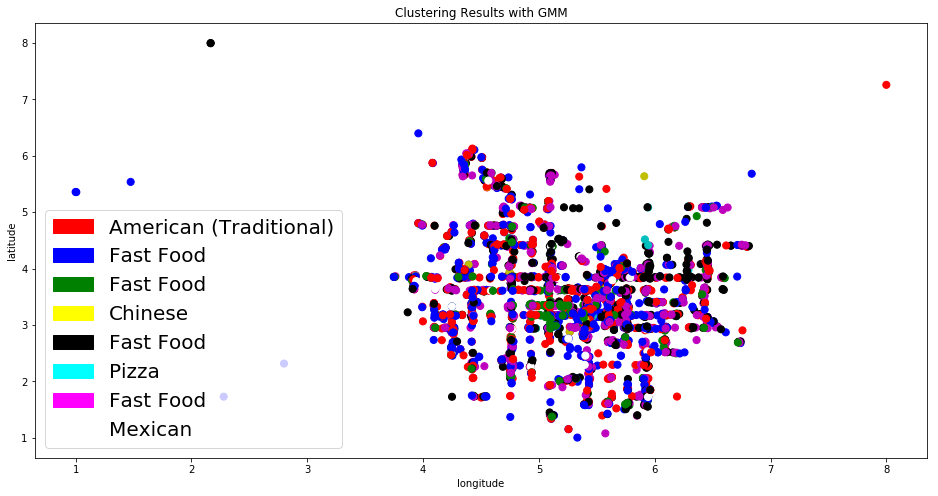

In [73]:
gmm = mixture.GaussianMixture(n_components=8, covariance_type='full')
gmm.fit(k)
gmm_label = gmm.predict(k)

colors = ['bgrcmykw'[p] for p in gmm_label]
plt.figure(figsize=(16,8))
blue_patch = mpatches.Patch(color='blue', label=categories[a0.index(max(a0[2:])) - 2])
green_patch = mpatches.Patch(color='green', label=categories[a1.index(max(a1[2:])) - 2])
red_patch = mpatches.Patch(color='red', label=categories[a2.index(max(a2[2:])) - 2])
cyan_patch = mpatches.Patch(color='cyan', label=categories[a3.index(max(a3[2:]))-2])
magenta_patch = mpatches.Patch(color='magenta', label=categories[a4.index(max(a4[2:]))-2])
yellow_patch = mpatches.Patch(color='yellow', label=categories[a5.index(max(a5[2:]))-2])
black_patch = mpatches.Patch(color='black', label=categories[a6.index(max(a6[2:]))-2])
white_patch = mpatches.Patch(color='white', label=categories[a7.index(max(a7[2:]))-2])
plt.legend(handles=[red_patch, blue_patch, green_patch, yellow_patch, black_patch,cyan_patch,magenta_patch,white_patch], loc = 'lower left', prop={'size': 20})
plt.title('Clustering Results with GMM')
plt.xlabel('longitude')
plt.ylabel('latitude')
_ = plt.scatter(k[:, 0], k[:, 1], color=colors, s=50)

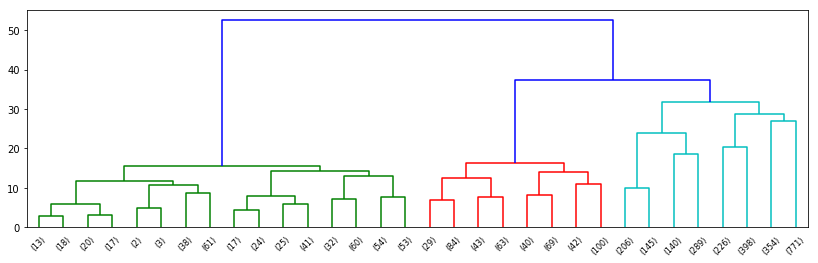

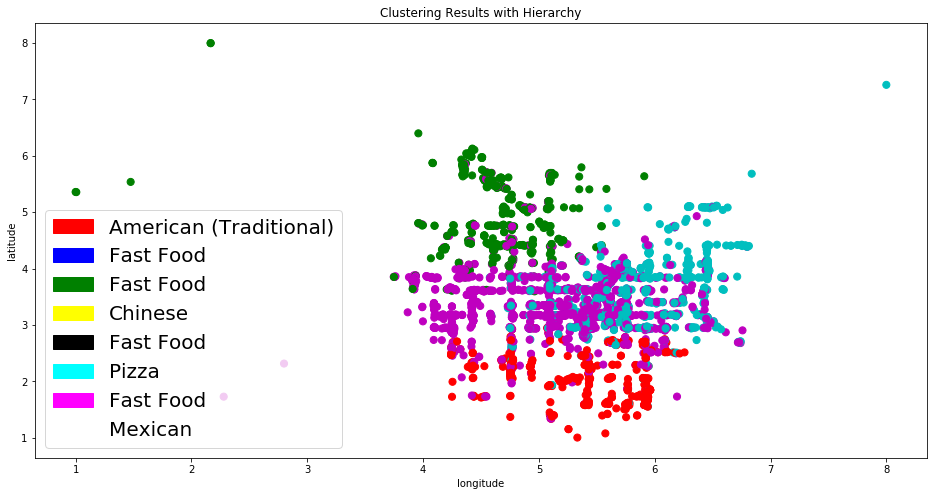

In [77]:
Z_20ng = hierarchy.linkage(k, method='ward', metric='euclidean')
plt.figure(figsize=(14,4))
R_20ng = hierarchy.dendrogram(Z_20ng, p=4, truncate_mode='level', show_leaf_counts=True)
hier_label = hierarchy.fcluster(Z_20ng,4,criterion="maxclust")
plt.show()

colors = ['bgrcmykw'[p] for p in hier_label]
plt.figure(figsize=(16,8))
blue_patch = mpatches.Patch(color='blue', label=categories[a0.index(max(a0[2:])) - 2])
green_patch = mpatches.Patch(color='green', label=categories[a1.index(max(a1[2:])) - 2])
red_patch = mpatches.Patch(color='red', label=categories[a2.index(max(a2[2:])) - 2])
cyan_patch = mpatches.Patch(color='cyan', label=categories[a3.index(max(a3[2:]))-2])
magenta_patch = mpatches.Patch(color='magenta', label=categories[a4.index(max(a4[2:]))-2])
yellow_patch = mpatches.Patch(color='yellow', label=categories[a5.index(max(a5[2:]))-2])
black_patch = mpatches.Patch(color='black', label=categories[a6.index(max(a6[2:]))-2])
white_patch = mpatches.Patch(color='white', label=categories[a7.index(max(a7[2:]))-2])
plt.legend(handles=[red_patch, blue_patch, green_patch, yellow_patch, black_patch,cyan_patch,magenta_patch,white_patch], loc = 'lower left', prop={'size': 20})
plt.title('Clustering Results with Hierarchy')
plt.xlabel('longitude')
plt.ylabel('latitude')
_ = plt.scatter(k[:, 0], k[:, 1], color=colors, s=50)

In [92]:
def findoutlier(cluster0,dst0):
    for i in range(len(cluster0)):
        dst = distance.euclidean(cluster0[i], centroid0)
        dst0.append(dst)
        dst0.sort()
    a = dst0[int(len(dst0) * .85)]

    for i in range(len(cluster0)):
        dst = distance.euclidean(cluster0[i], centroid0)
        if dst >= a:
            dst0 = dst
            outlier0.append(cluster0[i][:2])
    
    return outlier0

d) Now let's detect outliers. These are the points that are the farthest from the centroids of their clusters. In order to find the outliers, you need to find the distances of all cluster points from the centroid and select the ones whose distance is above the 85th percentile. **(3 pts)**

In [93]:
from scipy.spatial import distance
# print(len(cluster1))
centroid0 = centers[0]
centroid1 = centers[1]
centroid2 = centers[2]
centroid3 = centers[3]
centroid4 = centers[4]
centroid5 = centers[5]
centroid6 = centers[6]
centroid7 = centers[7]

outlier0 = []
outlier1 = []
outlier2 = []
outlier3 = []
outlier4 = []
outlier5 = []
outlier6 = []
outlier7 = []

dst0 = []
dst1 = []
dst2 = []
dst3 = []
dst4 = []
dst5 = []
dst6 = []
dst7 = []
a = 0

outlier0 = findoutlier(cluster0,dst0)
outlier1 = findoutlier(cluster1,dst1)
outlier2 = findoutlier(cluster2,dst2)
outlier3 = findoutlier(cluster3,dst3)
outlier4 = findoutlier(cluster4,dst4)
outlier5 = findoutlier(cluster5,dst5)
outlier6 = findoutlier(cluster6,dst6)
outlier7 = findoutlier(cluster7,dst7)


ot = outlier0+outlier1+outlier2+outlier3+outlier4+outlier5+outlier6+outlier7

print(centroid1[0])
print(ot)

5.63806249057
[[4.3563494636728137, 3.9679986586074847], [4.4293194766601118, 2.5043196031648449], [4.7413472844268654, 3.889589092457868], [4.3650691319357975, 3.9709561840227252], [4.3248830876614193, 3.8680471867398865], [4.1262673845305926, 3.8393245498231181], [3.9219855950636884, 3.6921046303634739], [4.3614323912645432, 3.973736781913658], [4.2614333586307112, 2.8796338689787717], [4.2471131123531904, 2.476814586177511], [4.0973090120037341, 2.9666360339758739], [3.9168938382520082, 3.6451960419295801], [3.7537609550199704, 3.8499949993098426], [4.7633529924212326, 2.6606147961365423], [4.2598804260685483, 2.8517486192866954], [4.7714957029704692, 2.6065471853179361], [4.2535547764366584, 2.452735222205888], [4.1629585635948843, 4.3346404545334281], [4.2530016407811218, 2.9080649582215301], [4.191934117558958, 4.3686560852996763], [4.2307069254859471, 2.9286115384691129], [4.3935443010911968, 4.0687859588670108], [3.9362299979688942, 3.8804259730510466], [4.1619306703150869, 2.7

Text(0.5,0,'K-means  outlier')

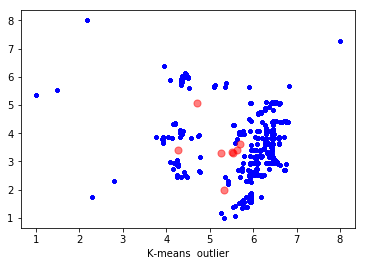

In [95]:
ot = np.asarray(ot)

plt.scatter(ot[:, 0], ot[:, 1], color='b', s=10)
plt.scatter(centroid0[0], centroid0[1], c='red', s=50, alpha=0.5);
plt.scatter(centroid1[0], centroid1[1], c='red', s=50, alpha=0.5);
plt.scatter(centroid2[0], centroid2[1], c='red', s=50, alpha=0.5);
plt.scatter(centroid3[0], centroid3[1], c='red', s=50, alpha=0.5);
plt.scatter(centroid4[0], centroid4[1], c='red', s=50, alpha=0.5);
plt.scatter(centroid5[0], centroid5[1], c='red', s=50, alpha=0.5);
plt.scatter(centroid6[0], centroid6[1], c='red', s=50, alpha=0.5);
plt.scatter(centroid7[0], centroid7[1], c='red', s=50, alpha=0.5);
plt.xlabel("K-means  outlier")

e) Give an analysis comparing the results you obtained from the 3 techniques. **(1 pts)**

K-means uses distances to calculate each point is included by which cluster
Gmm translate each point into  Gaussians distribution then find clusters. If a point cant be translate into  Gaussians distribution perfectly, the cluster would be not precisely.

----------